In [11]:
from typing import TypedDict


class Box(TypedDict):
    'Standard box data format for ROI'
    x1: float
    y1: float
    width: float
    height: float

class KeypointData(TypedDict):
    'Data format for each fram of the AlphaPose output'
    image_id: str
    category_id: int
    keypoints: list[float]
    score: float
    box: list[float]
    idx: list[float]

class SignerData(TypedDict):
    'Data format for generated signer data file'
    scores: list[float]
    roi: Box
    keypoints: list[KeypointData]

In [12]:
import json
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams.update({'font.size': 18})
color="dodgerblue"
figs_path = Path("../data/graphs/signers")
figs_path.mkdir(exist_ok=True)

def save_fig(fig, name: str, path: Path):
    fig.get_figure().savefig(path.resolve() / name, bbox_inches = 'tight')

path = Path("../data/cuts/")
cuts = path.glob('**/*[_signer].json')

scores: list[list[float]] = []

for idx, cut in enumerate(cuts):
    with cut.open() as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data['scores'])

count    14880.000000
mean         2.592742
std          2.624416
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         29.000000
dtype: float64

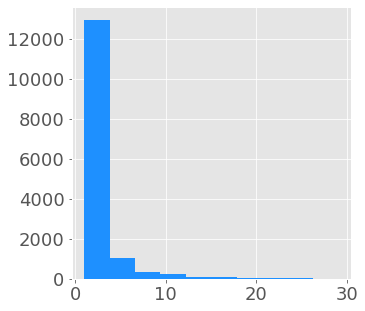

In [13]:
signers_s = pd.Series(map(len, scores))
display(signers_s.describe())
signers_fig = signers_s.hist(figsize=(5,5), color=color)
save_fig(signers_fig, "signers_hist.png", figs_path)


count    10790.000000
mean         0.865963
std          0.231736
min          0.000000
25%          0.849384
50%          0.985450
75%          1.000000
max          1.000000
dtype: float64

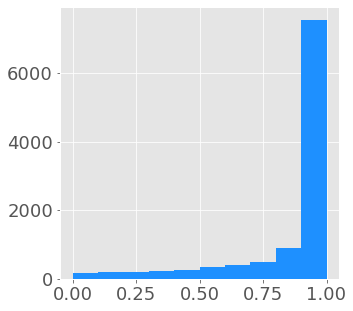

In [14]:
def get_score(scores: list[float]):
    m1 = max(scores)
    scores = scores.copy()
    scores.remove(m1)
    return 0 if m1 == 0 else (m1 - max(scores)) / m1

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) >= 2, scores)))
display(scores_s.describe())
scores_fig = scores_s.hist(figsize=(5,5), color=color)
save_fig(scores_fig, "scores_hist.png", figs_path)

count    7100.000000
mean        0.851537
std         0.245378
min         0.000000
25%         0.815712
50%         0.984713
75%         1.000000
max         1.000000
dtype: float64

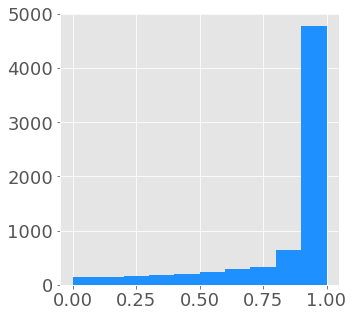

In [15]:
scores_2_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
display(scores_2_s.describe())
scores_2_fig = scores_2_s.hist(figsize=(5,5), color=color)
save_fig(scores_2_fig, "scores_2_hist.png", figs_path)

count    3690.000000
mean        0.893722
std         0.200048
min         0.003477
25%         0.904139
50%         0.985956
75%         1.000000
max         1.000000
dtype: float64

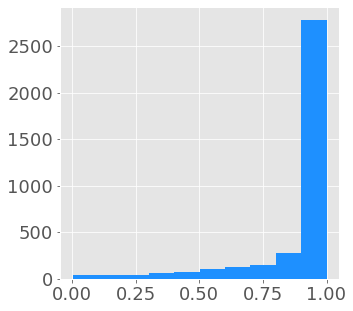

In [16]:
scores_gt2_s = pd.Series(map(get_score, filter(lambda s: len(s) > 2, scores)))
display(scores_gt2_s.describe())
scores_gt2_fig = scores_gt2_s.hist(figsize=(5,5), color=color)
save_fig(scores_gt2_fig, "scores_gt2_hist.png", figs_path)

Nose keypoint confidence analisys

In [19]:
cuts = path.glob('**/*[_signer].json')

nose_conf: list[float] = []
for idx, cut in enumerate(cuts):
    if idx % 1000 == 0:
        print(idx)
    with cut.open() as datafile:
        signer_data: SignerData = json.load(datafile)
    nose_conf.extend(map(lambda kd: kd['keypoints'][2], signer_data['keypoints']))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


KeyboardInterrupt: 

/tmp/ipykernel_17378/1383009739.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nose_conf_s = pd.Series(nose_conf)


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64

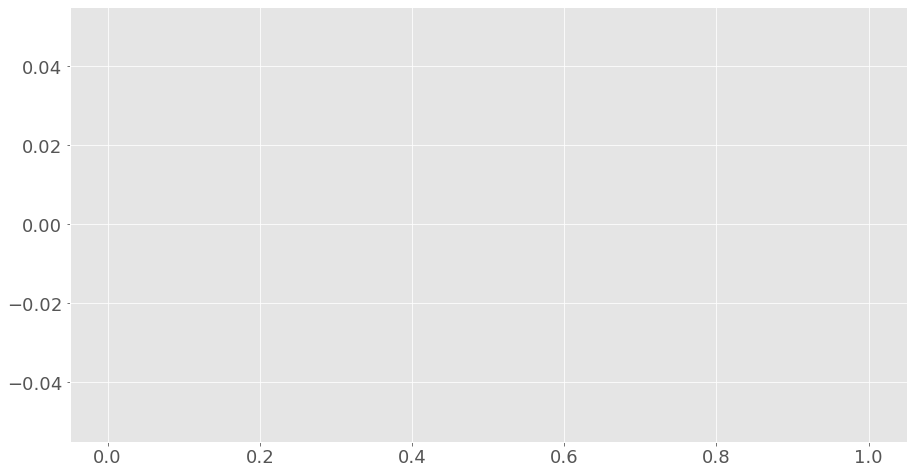

In [18]:
nose_conf_s = pd.Series(nose_conf)
display(nose_conf_s.describe())
nose_conf_fig = nose_conf_s.hist(bins=30,figsize=(15,8))
save_fig(nose_conf_fig, "nose_conf_hist.png", figs_path)